<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Martin%20Lukan%20DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [13]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

# Drop the rows with missing values
# Drop the "name" column
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2
data = data.drop(columns=['name'])
data.dropna(axis='index',inplace=True)
trans={"origin":{"usa":0,"japan":1,"europe":2}}
data = data.replace(trans)
data.head
data["origin"].value_counts()
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


In [14]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
X=data.copy()
X=X.drop(columns='mpg')
y=data.copy()
y=y['mpg']
print('X:',X.head)
print('y',y.head)

X_train, X_test, y_train, y_test = train_test_split(X, y)

<bound method NDFrame.head of      cylinders  displacement  horsepower  ...  acceleration  model_year  origin
0            8         307.0       130.0  ...          12.0          70       0
1            8         350.0       165.0  ...          11.5          70       0
2            8         318.0       150.0  ...          11.0          70       0
3            8         304.0       150.0  ...          12.0          70       0
4            8         302.0       140.0  ...          10.5          70       0
..         ...           ...         ...  ...           ...         ...     ...
393          4         140.0        86.0  ...          15.6          82       0
394          4          97.0        52.0  ...          24.6          82       2
395          4         135.0        84.0  ...          11.6          82       0
396          4         120.0        79.0  ...          18.6          82       0
397          4         119.0        82.0  ...          19.4          82       0

[392 rows

In [21]:
# Fit a decision tree
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [23]:
# Predict on the xtest set
prediction=modelDTR.predict(X_test)

In [24]:
# Print out the R2 score.
modelDTR.score(X_test, y_test, sample_weight=None)

0.7482471655169012

In [33]:
# Print each feature with importance %
zipped=zip(list(X.columns),list(modelDTR.feature_importances_))
[print(i) for i in zipped]



('cylinders', 0.6163029287814644)
('displacement', 0.07113770099370015)
('horsepower', 0.11707021683754534)
('weight', 0.05911434948443448)
('acceleration', 0.034634969105999995)
('model_year', 0.09642814472286775)
('origin', 0.005311690073987933)


[None, None, None, None, None, None, None]

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


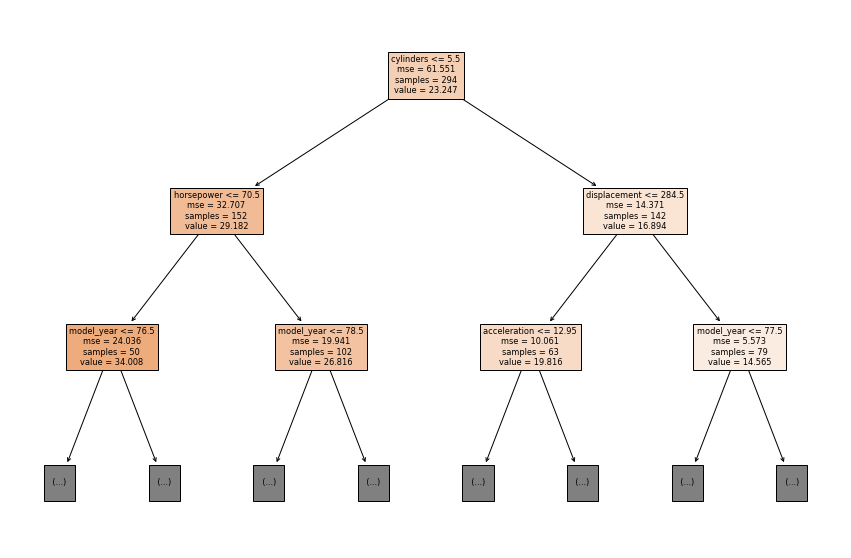

In [51]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
plot_tree(modelDTR, filled = True,  
          class_names = modelDTR.classes_, 
          feature_names=X_train.columns,max_depth=2 )
plt.show()

## Classification Trees

In [39]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')

# Drop rows with missing values
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

pengdata=data.copy()
pengdata.dropna(axis='index',inplace=True)
trans={'species':{"Adelie":0,"Chinstrap":1,"Gentoo":2},"island":{"Torgersen":0,"Biscoe":1,"Dream":2}}
pengdata=pengdata.replace(trans)
print(pengdata.head)
print(pengdata["species"].value_counts())
print(pengdata["island"].value_counts())

<bound method NDFrame.head of      species  island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0          0       0            39.1  ...              181.0       3750.0    Male
1          0       0            39.5  ...              186.0       3800.0  Female
2          0       0            40.3  ...              195.0       3250.0  Female
4          0       0            36.7  ...              193.0       3450.0  Female
5          0       0            39.3  ...              190.0       3650.0    Male
..       ...     ...             ...  ...                ...          ...     ...
338        2       1            47.2  ...              214.0       4925.0  Female
340        2       1            46.8  ...              215.0       4850.0  Female
341        2       1            50.4  ...              222.0       5750.0    Male
342        2       1            45.2  ...              212.0       5200.0  Female
343        2       1            49.9  ...              213.0       5

In [40]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
Xp=pengdata.copy()
Xp=Xp.drop(columns='sex')
yp=pengdata.copy()
yp=yp['sex']

Xp_train,Xp_test,yp_train,yp_test=train_test_split(Xp,yp,random_state=42,test_size=0.20)

In [43]:
# Using a random state of 42, fit the classification tree.
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(Xp_train, yp_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
# Print the predictions on the test set
modelDTC.predict(Xp_test)


array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

In [46]:
# Print the accuracy score for the predictions
modelDTC.score(Xp_test,yp_test)

0.8507462686567164

In [68]:
# Print each feature with importance %
zipped=zip(list(Xp.columns),list(modelDTC.feature_importances_))
[print(i) for i in zipped]



('species', 0.0075294384057971)
('island', 0.0)
('bill_length_mm', 0.09185427008911619)
('bill_depth_mm', 0.47532285966341575)
('flipper_length_mm', 0.04184216485507246)
('body_mass_g', 0.38345126698659854)


[None, None, None, None, None, None]

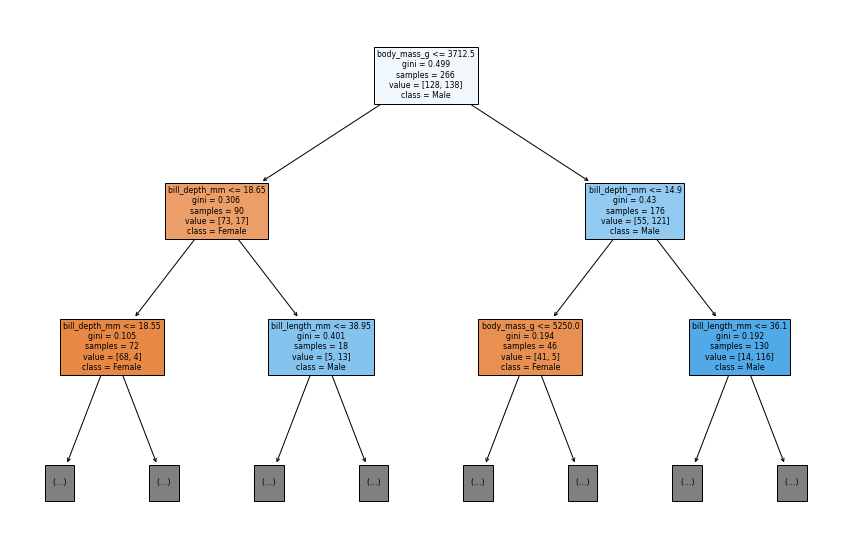

In [49]:
# Plot the results
# Use column names as feature names and a max_depth of only 2

plt.figure(figsize = (15,10))
plot_tree(modelDTC, filled = True,  
          class_names = modelDTC.classes_, 
          feature_names=Xp_train.columns, max_depth=2 )
plt.show()


# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [59]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies = []
for i in range(1, 11):
  model= DecisionTreeClassifier(max_depth=i)
  model.fit(Xp_train, yp_train)
  list_of_accuracies.append([i,model.score(Xp_test,yp_test)])


In [69]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
accuracydf=pd.DataFrame(list_of_accuracies, columns = ['Max depth', 'Accuracy'])
accuracydf

,Max depth,Accuracy
0,1,0.701493
1,2,0.820896
2,3,0.835821
3,4,0.865672
4,5,0.850746
5,6,0.850746
6,7,0.850746
7,8,0.865672
8,9,0.850746
9,10,0.850746


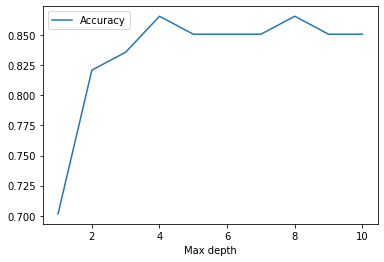

In [71]:
accuracydf.plot.line(x='Max depth',y='Accuracy')